<a href="https://colab.research.google.com/github/jackielpp/nusdevops/blob/main/Equities_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import math
import numpy as np
import pandas as pd

In [ ]:
stock_symbol = "M44U.SI"
benchmark_symbol = "^STI"
start = "2021-1-1"
end = "2021-12-31"

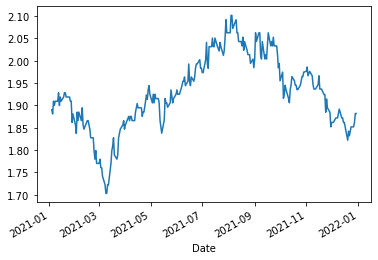

In [ ]:
#stock check
hist_stock = yf.Ticker(stock_symbol).history(start=start, end=end)
hist_stock
hist_stock ["Close"].plot()

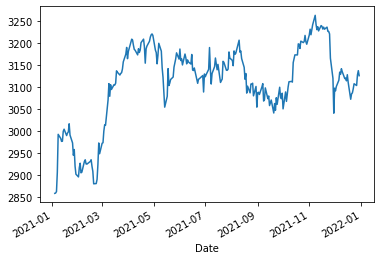

In [ ]:
#benchmark check
hist_benchmark = yf.Ticker(benchmark_symbol).history(start=start, end=end)
hist_benchmark
hist_benchmark ["Close"].plot()

In [4]:
def BASS(stock_symbol, benchmark_symbol,start, end):

  #Prepare data with returns. Normal returns are used. Can also use log returns
  df = pd.DataFrame()
  df['Benchmark'] = yf.Ticker(benchmark_symbol).history(start=start, end=end).Close
  df['Stock'] = yf.Ticket(stock_symbol).history(start=start, end=end).Close
  df['Benchmark_Returns'] = df['Benchmark'].pct_change()
  df['Stock_Returns'] = df['Stock'].pct_change()
  df = df.dropna()

  #calculate Beta
  cov = df['Benchmark_Returns'].cov(df['Stock_Returns'])
  var = df['Benchmark_Returns'].var()
  beta = cov /var
  beta = round(beta, 2)

  #calculate Alpha
  benchmark_abs_returns = (df['Benchmark'][-1] - df['Benchmark'][0]) / df['Benchmark'][0]
  stock_abs_returns = (df['Stock'][-1] - df['Stock'][0]) / df['Stock'][0]
  alpha = (stock_abs_returns - beta * benchmark_abs_returns) * 1000
  alpha = round(alpha, 2)

  #calculate Standard deviation of stock
  std_dev = (df['Stock_Returns'].std()) * 100
  std_dev = round(std_dev, 2)

  #calculate Sharpe Ratio of Stock
  avg_returns = df['Stock_Returns'].mean()
  std = df['Stock_Returns'].std()
  daily_SR = avg_returns / std
  annual_SR = daily_SR * (252**0.5)
  annual_SR = round(annual_SR, 2)

